In [ ]:
import pandas as pd

df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin-1')

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


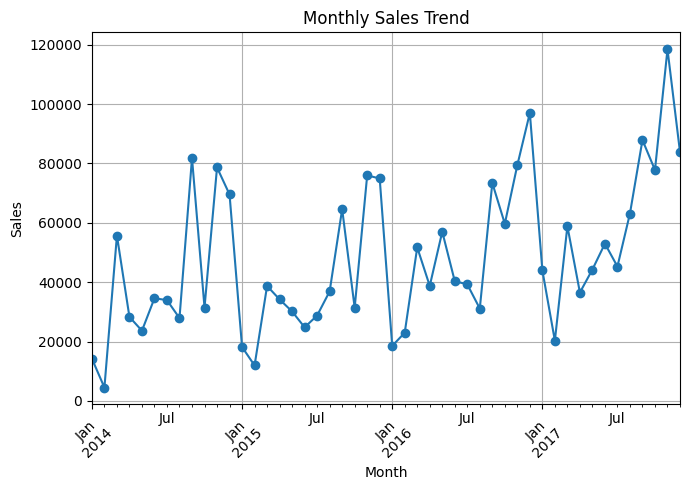

In [ ]:
import matplotlib.pyplot as plt

df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(7,5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-23-3241793326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='plasma')


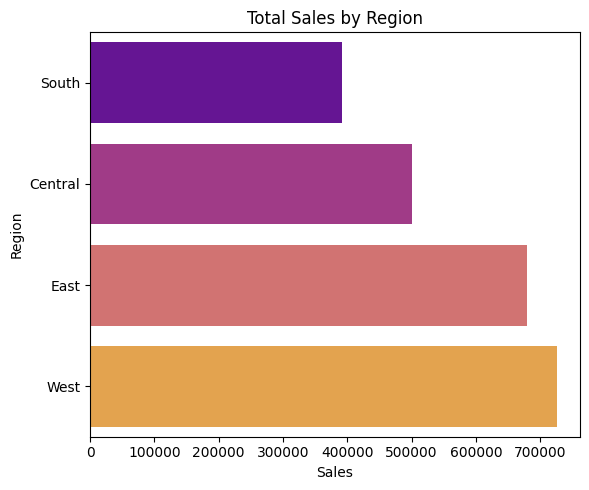

In [ ]:
import seaborn as sns

region_sales = df.groupby('Region')['Sales'].sum().sort_values()

plt.figure(figsize=(6,5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='plasma')
plt.title('Total Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

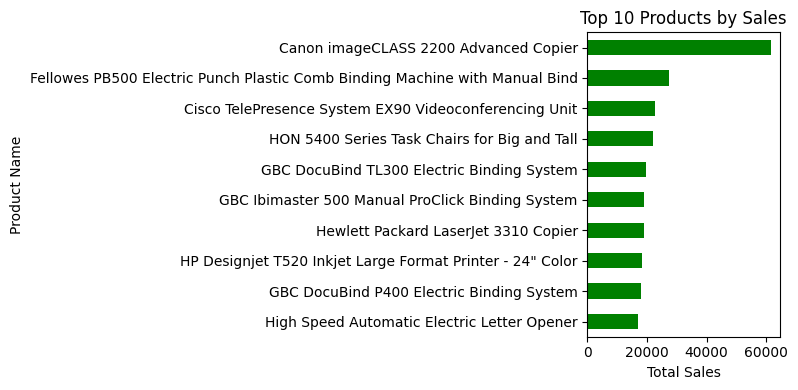

In [ ]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
top_products.plot(kind='barh', color='green')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

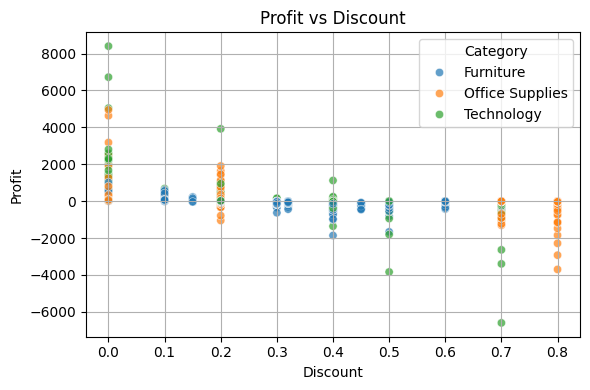

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

## Insights from the above plot
- Higher Discount = Lower Profit
- Discounts of 0.0 and 0.2 are common — and profitable
- Technology products show higher profit variance
- However, deep discounts on Tech show sharp losses.
- Almost no orders use 0.6 discount.
- Office Supplies and Furniture are very sensitive to discounting.

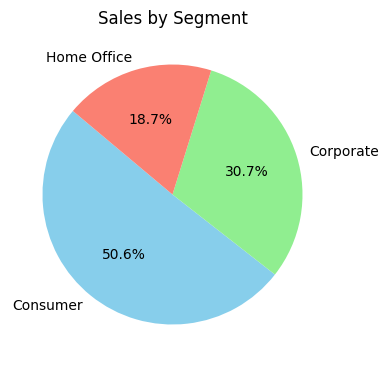

In [ ]:
segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(4,4))
segment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sales by Segment')
plt.ylabel('')
plt.tight_layout()
plt.show()

- Consumer segment dominates sales
- Corporate is the second-largest segment
- Home Office has the smallest share

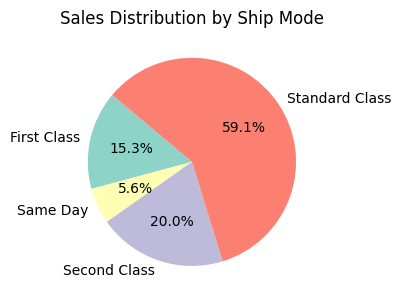

In [ ]:
ship_sales = df.groupby('Ship Mode')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(ship_sales, labels=ship_sales.index, startangle=140, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Sales Distribution by Ship Mode")
plt.tight_layout()
plt.show()